In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.basemap import Basemap
from itertools import chain
import math
from os import listdir
from os.path import isfile, join
%matplotlib inline

# A visulization of routes btw regions - daily based

In [17]:
def draw_map(m, scale=0.5):
    """
    plot backgroud map
    m: Basemap object
    scale: plot scale
    return: plot a backgroud map
    """
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    #m.bluemarble(scale=scale)  #Project NASA's blue marble image onto the map
    #m.drawcoastlines()
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

def plotPorts(df,directory="C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/",file_name="longVoyage_3000.png"):
    """
    Plot ports on geomap
    df: dataframe with location coordinates
    """
    #bbox=(df.ais_position_latitude.min(),df.ais_position_latitude.max(),df.ais_position_longitude.min(),df.ais_position_longitude.max())                                                        
    bbox=(-30,60,100,330)
    #print ("The respective minimum and maximum latitude and longitude coordiates of ports are:",bbox)

    
    fig,ax=plt.subplots(figsize=(22,14))
    m = Basemap(ax=ax,projection='cyl',resolution='l',
                llcrnrlat=bbox[0], urcrnrlat=bbox[1],
                llcrnrlon=bbox[2], urcrnrlon=bbox[3])

    # df.ais_position_longitude    
    ax.scatter(df.ais_lon_new,df.ais_position_latitude,c=df.journey_distance_nm,s=40) 
    draw_map(m)
    m.drawmeridians(np.arange(0,360,30),labels=[True,False,False,True],linewidth=0.5,fontsize=12)
    m.drawparallels(np.arange(-45,61,15),labels=[1,0,1,1], linewidth=0.5, fontsize=12)

    ax.set_xlim(bbox[2],bbox[3]);
    ax.set_ylim(bbox[0],bbox[1]);
    ax.set_xlabel("Longitude",fontsize=18)
    ax.set_ylabel("Latitude",fontsize=18)
    ax.xaxis.set_label_coords(0.55, -0.06)
    ax.yaxis.set_label_coords(-0.06,0.45)
    #ax.legend(loc='best',fontsize=10,frameon=False)
    #fig.savefig(directory+file_name,dpi=400)
    
def plotPorts_1(df,directory="C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/",file_name="longVoyage_3000.png"):
    """
    Plot ports on geomap
    df: dataframe with location coordinates
    """
    #bbox=(df.ais_position_latitude.min(),df.ais_position_latitude.max(),df.ais_position_longitude.min(),df.ais_position_longitude.max())                                                        
    bbox=(-90,90,-180,180)
    #print ("The respective minimum and maximum latitude and longitude coordiates of ports are:",bbox)

    
    fig,ax=plt.subplots(figsize=(22,14))
    m = Basemap(ax=ax,projection='cyl',resolution='l',
                llcrnrlat=bbox[0], urcrnrlat=bbox[1],
                llcrnrlon=bbox[2], urcrnrlon=bbox[3])

    # df.ais_position_longitude    
    ax.scatter(df.Longitude,df.Latitude,s=40) 
    draw_map(m)
    m.drawmeridians(np.arange(0,360,30),labels=[True,False,False,True],linewidth=0.5,fontsize=12)
    m.drawparallels(np.arange(-45,61,15),labels=[1,0,1,1], linewidth=0.5, fontsize=12)

    ax.set_xlim(bbox[2],bbox[3]);
    ax.set_ylim(bbox[0],bbox[1]);
    ax.set_xlabel("Longitude",fontsize=18)
    ax.set_ylabel("Latitude",fontsize=18)
    ax.xaxis.set_label_coords(0.55, -0.06)
    ax.yaxis.set_label_coords(-0.06,0.45)
    #ax.legend(loc='best',fontsize=10,frameon=False)
    #fig.savefig(directory+file_name,dpi=400)
    
def check_missData(df):
    """
    check the missing data of dataFrame.
    return: a dataFrame describing missing data percentage
    sum(): count the number of missing data in each column
    isnull(): return a dataFrame with True and False   
    """
    miss_tot=df.isnull().sum().sort_values(ascending=False)
    counts_all=df.isnull().count() # count all the elements, including the missed elements
    miss_per=((df.isnull().sum())*100/counts_all).sort_values(ascending=False)
    miss_all=pd.concat([miss_tot,miss_per],axis=1,keys=['TotalNum','TotalPerc(\%)'])
    return miss_all


def findmainPorts(df,regionName="Gulf"):
    """
    find all the ports within a region
    return: list with all ports in a region
    """
    ports_region=[]
    for i, row in df[df.Region==regionName].iterrows():
        port=row["Port Group"]
        ports_region.append(port)
    ports_region=list(set(ports_region))
    
    return ports_region
    

def trans_coods(df):
    """
    transform the coordinates of longituds from format (-180,180) to format (0,360)
    return: a new dataframe with an extra column "ais_lon_new"
    """
    df_copy=df.copy()
    for ix,row in df_copy.iterrows():

        lon=row["ais_position_longitude"]

        if lon<=0:
            df_copy.at[ix,"ais_lon_new"]=lon+360
        else:
            df_copy.at[ix,"ais_lon_new"]=lon
    return df_copy

        
def readFiles(mypath="C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/ais_routeRegions/"):
    """
    return a list contaning all the file names in given directory
    """
    # epair path to files by join(path,file)
    # isfile:check if it is a standard file
    files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    return files

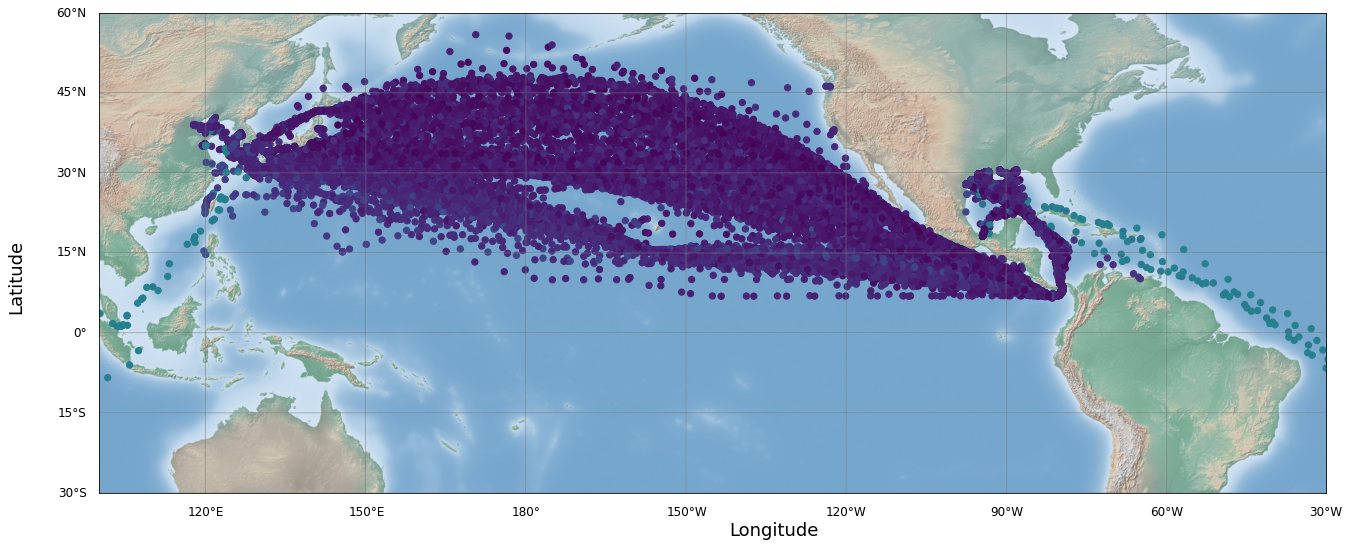

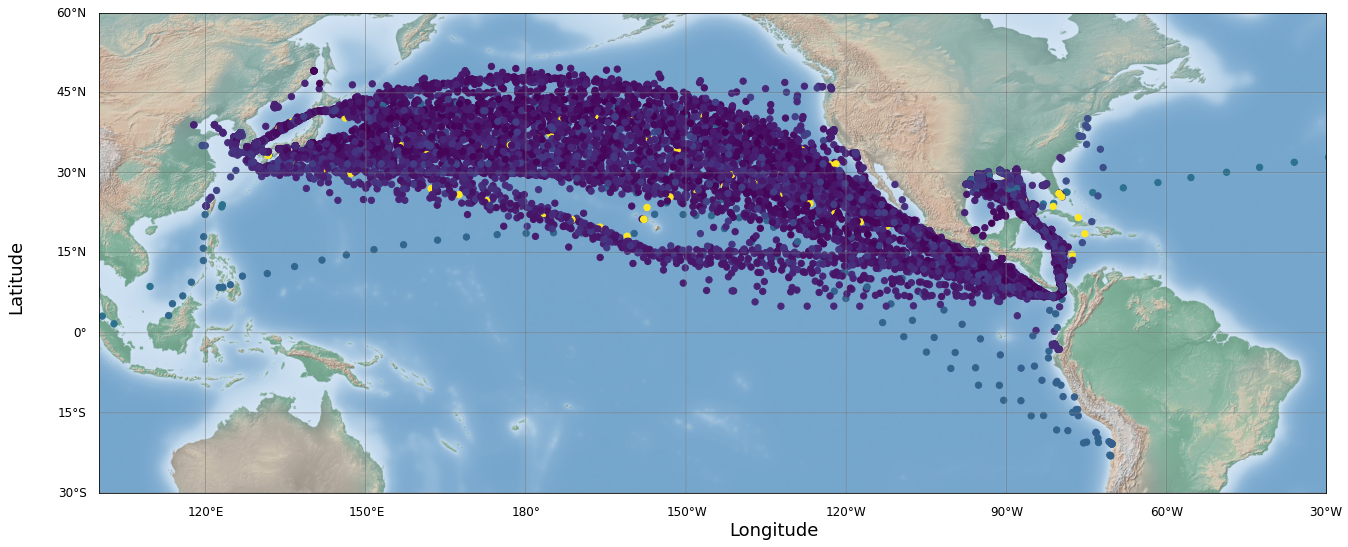

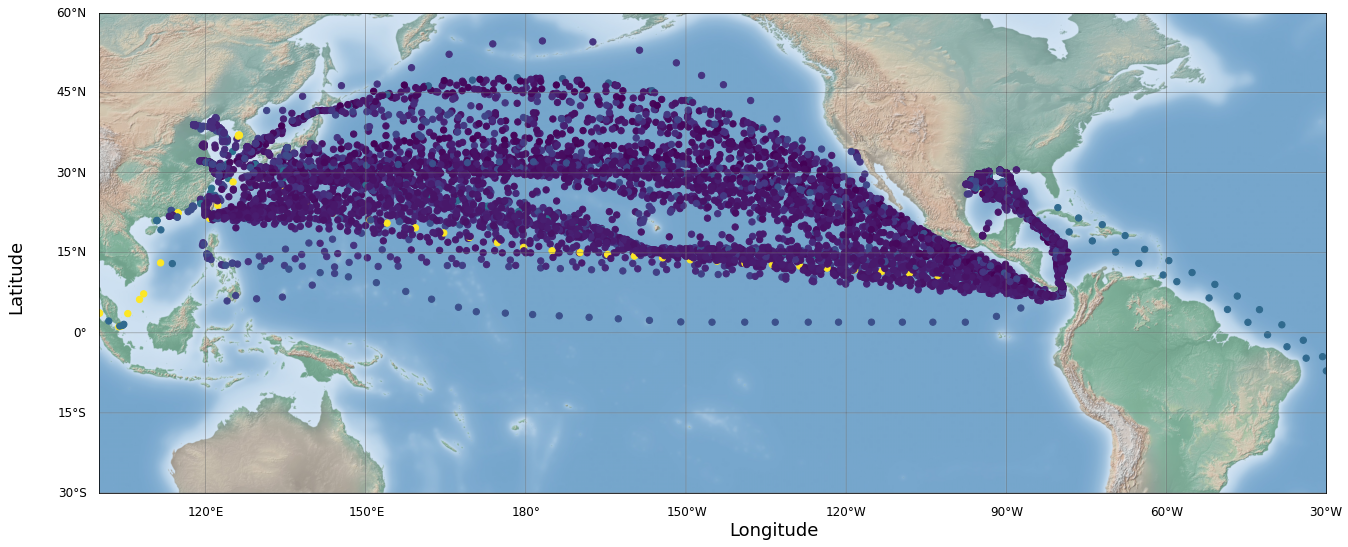

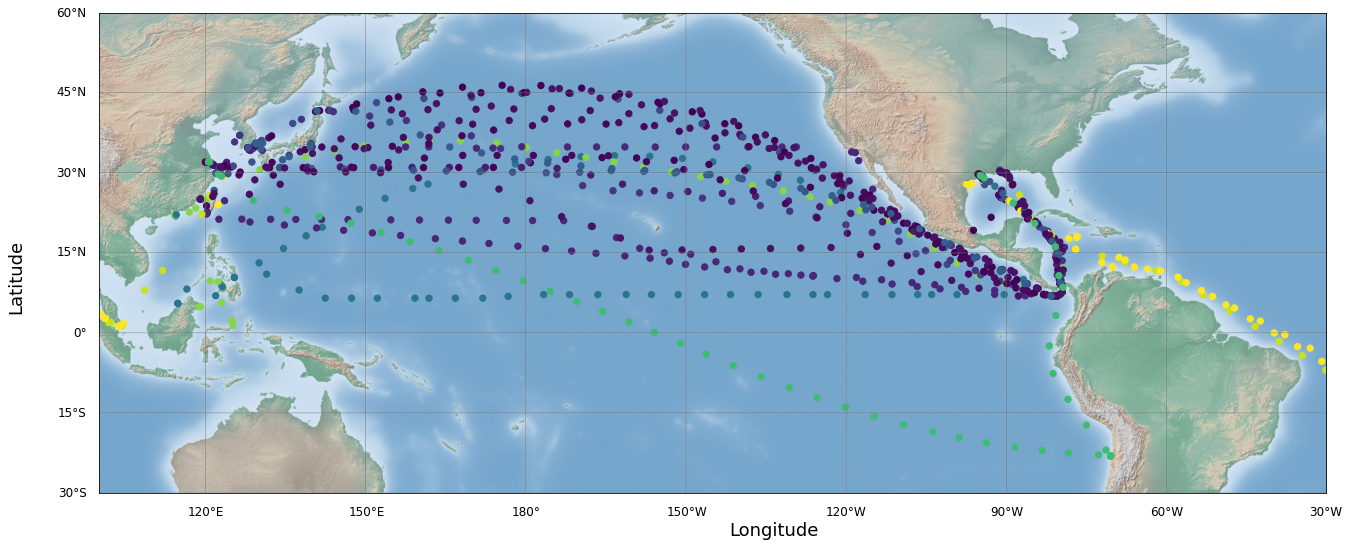

In [4]:
# routes between Gulf region and the North east Asia
df_gulf2ne=pd.read_csv("C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/ais_routeRegions/ais_Gulf2NE_Asia.csv")
df_gulf2ne=trans_coods(df_gulf2ne)
plotPorts(df_gulf2ne)

df_ne2gulf=pd.read_csv("C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/ais_routeRegions/ais_NE_Asia2Gulf.csv")
df_ne2gulf=trans_coods(df_ne2gulf)
plotPorts(df_ne2gulf)


# routes between Gulf and East Asia
df_gulf2easian=pd.read_csv("C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/ais_routeRegions/ais_Gulf2East_Asia.csv")
df_gulf2easian=trans_coods(df_gulf2easian)
plotPorts(df_gulf2easian)

df_easian2gulf=pd.read_csv("C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/ais_routeRegions/ais_East_Asia2Gulf.csv")
df_easian2gulf=trans_coods(df_easian2gulf)
plotPorts(df_easian2gulf)

In [7]:
df_gulf2ne.head()

,ais_position_id,ais_position_timestamp,ais_position_latitude,ais_position_longitude,ship_id,ship_imo,ship_name,journey_id,journey_start_timestamp,journey_start_location_name,...,start_lat,start_lon,start_calls,start_group,end_region,end_lat,end_lon,end_calls,end_group,ais_lon_new
0,5009051,2014-01-01 20:37:27,29.36183,-94.91467,9281580.0,9281580.0,Ioannis I,283867747,2013-12-23 09:15:37,Corpus Christi,...,27.86933,-97.246,4623.0,Corpus Christi,NE Asia,38.96475,121.91007,6613.0,Dalian,265.08533
1,12765887,2014-01-03 20:33:19,28.77648,-93.76507,9281580.0,9281580.0,Ioannis I,283867747,2013-12-23 09:15:37,Corpus Christi,...,27.86933,-97.246,4623.0,Corpus Christi,NE Asia,38.96475,121.91007,6613.0,Dalian,266.23493
2,23863844,2014-01-05 20:23:37,21.63050,-85.64267,9281580.0,9281580.0,Ioannis I,283867747,2013-12-23 09:15:37,Corpus Christi,...,27.86933,-97.246,4623.0,Corpus Christi,NE Asia,38.96475,121.91007,6613.0,Dalian,274.35733
3,29058404,2014-01-06 18:13:49,18.02742,-82.08963,9281580.0,9281580.0,Ioannis I,283867747,2013-12-23 09:15:37,Corpus Christi,...,27.86933,-97.246,4623.0,Corpus Christi,NE Asia,38.96475,121.91007,6613.0,Dalian,277.91037
4,36342026,2014-01-07 21:07:29,12.83300,-80.46333,9281580.0,9281580.0,Ioannis I,283867747,2013-12-23 09:15:37,Corpus Christi,...,27.86933,-97.246,4623.0,Corpus Christi,NE Asia,38.96475,121.91007,6613.0,Dalian,279.53667
